In [1]:
# Load the packages
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import sys
import csv
import math
import keras
import argparse
import scipy.io
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/affine/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.regularizers import L1L2
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD

In [3]:
#Load dataset
master_data= pd.read_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/tgs-data-science-master-c3f8b3a2900f40ddde655f8ef5f17d00cfaa7033/data/Master_dataset_v1.csv')

/home/affine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,20,23,25,34,48,65,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Columns in dataset
master_data.columns

Index(['Unnamed: 0', 'WellId', 'LeaseId', 'GroupId', 'API', 'FieldName_x',
       'Well Name and Number', 'WellNumber_x', 'OperatorName_x', 'StateName_x',
       'County_x', 'ProductionMonthYear', 'DaysOnProduction', 'Gas', 'Oil',
       'Water', 'ProductionType', 'ProductionTypeName', 'WellsReported',
       'AllocationMethod', 'DisplayFormation_x', 'StateLeaseId', 'WellName',
       'WellNumber_y', 'BasinName', 'DisplayFormation_y', 'Township',
       'TownshipDirection', 'Range', 'RangeDirection', 'Section', 'District',
       'Abstract', 'Survey', 'Block', 'Offshore', 'Area', 'OffshoreBlock',
       'QuarterQuarter', 'FootageNS', 'DirectionNS', 'FootageEW',
       'DirectionEW', 'SurfaceLatitude', 'SurfaceLongitude', 'BottomLatitude',
       'BottomLongitude', 'SpudDate', 'PlugDate', 'CompletionDate',
       'FirstProductionDate', 'FirstMonth', 'HasProduction', 'WellType',
       'TotalVerticalDepth', 'MeasuredDepth', 'ElevationGround',
       'ElevationKellyBushing', 'ElevationWat

In [5]:
#selecting Operator 'Occidental W TX OVERTHRUST INC.'
master_data1=master_data[master_data.OperatorName_x=="OCCIDENTAL W TX OVERTHRUST INC."]
#master_data1.head()

In [6]:
#select required API
master_data1=master_data1[master_data1.API==42371383480000]#42371381890000]#42371378930000]
labels=['Gas','ProductionMonthYear1','YearMonth']
master_data1=master_data1[labels]

#Sort data based on YearMonth
master_data1=master_data1.sort_values(by=['YearMonth'])#, ascending=[1, 1],axis=1)
#master_data1.tail()

In [7]:
master_data2=master_data1
master_data2=pd.DataFrame(master_data2)
# master_data2['start_date']=datetime.strptime(master_data1['ProductionMonthYear1'].iloc[0], "%Y-%m-%d")
# print(type(pd.DataFrame(master_data2['start_date']).iloc[0,0]))
# print(type(pd.DataFrame(master_data2['ProductionMonthYear1']).iloc[0,0]))

In [8]:
# master_data2['ProductionMonthYear1']=master_data2['ProductionMonthYear1'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# master_data2['days_age']=master_data2['ProductionMonthYear1'].sub(master_data2['start_date'])
# master_data2['days_age']=master_data2['days_age']/np.timedelta64(1,'D')

In [9]:
#Set YearMonth as Index for production
master_data2=master_data2[['YearMonth','Gas']]#,'days_age']]
master_data2=master_data2.iloc[:-1,:]# removing 201708 & 201709 values as they were zeros
master_data2.set_index('YearMonth')

,Gas
YearMonth,
200906,13495.0
200907,51786.0
200908,62032.0
200909,38865.0
200910,83001.0
200911,78734.0
200912,176114.0
201001,166412.0
201002,141010.0


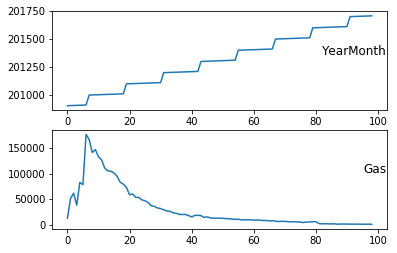

In [10]:
from matplotlib import pyplot
# load dataset
dataset = master_data2
values = dataset.values

# specify columns to plot
groups = [0,1]#,2]#3,4]#,5,6,7,8,9,10]
i = 0
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i+1)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [11]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
#Define lag(time steps for training) and n_seq(number of time steps to be predicted in future)
n_seq = 12
n_feature=1
n_lag= 12


In [274]:
# load dataset
dataset = master_data2.iloc[:,1:]
values = dataset.values
print(values.shape)
# ensure all data is float
values = values.astype('float32')
#print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape)
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_seq)

# drop columns we don't want to predict
# reframed.drop(reframed.iloc[:,25:], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)

(99, 1)
(99, 1)
    var1(t-12)  var1(t-11)  var1(t-10)  var1(t-9)  var1(t-8)  var1(t-7)  \
12    0.068235    0.287633    0.346340   0.213599   0.466487   0.442038   
13    0.287633    0.346340    0.213599   0.466487   0.442038   1.000000   
14    0.346340    0.213599    0.466487   0.442038   1.000000   0.944410   
15    0.213599    0.466487    0.442038   1.000000   0.944410   0.798863   
16    0.466487    0.442038    1.000000   0.944410   0.798863   0.831110   

    var1(t-6)  var1(t-5)  var1(t-4)  var1(t-3)     ...      var1(t+2)  \
12   1.000000   0.944410   0.798863   0.831110     ...       0.591206   
13   0.944410   0.798863   0.831110   0.750785     ...       0.571055   
14   0.798863   0.831110   0.750785   0.716882     ...       0.534075   
15   0.831110   0.750785   0.716882   0.626685     ...       0.467759   
16   0.750785   0.716882   0.626685   0.595096     ...       0.447458   

    var1(t+3)  var1(t+4)  var1(t+5)  var1(t+6)  var1(t+7)  var1(t+8)  \
12   0.571055   0.5340

In [293]:
# split into train and test sets
values = reframed.values
train = values[:-1, :]
test = values[-1:, :]

# split into input and outputs
train_X, train_y = train[:, :-(n_seq)], train[:, -(n_seq):]
test_X, test_y = test[:, :-n_seq], test[:, -n_seq:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_feature))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_feature))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(75, 12, 1) (75, 12) (1, 12, 1) (1, 12)


In [310]:
#Hyperparameters
h1=n_lag
h2=n_lag
h3=n_seq
h4=n_seq
drop1=0.2
drop2=0.1
drop3=0.0 
drop4=0.0
n_y=n_seq
epoch=1000
batch_size=16
lr=0.0009
L1=0.00
L2=0.01

In [311]:
# model.add(LSTM(h1, batch_input_shape=(batch_size,train_X.shape[1],train_X.shape[2]), stateful=True))#,return_sequences=True, recurrent_regularizer=reg))

In [302]:
# # design network
# model = Sequential()
# reg = L1L2(l1=L1, l2=L2)
# model.add(LSTM(h1, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True, recurrent_regularizer=reg))
# model.add(Dropout(drop1, seed = 1))
# model.add(LSTM(h2,return_sequences=True))
# model.add(Dropout(drop2, seed = 1))
# model.add(LSTM(h3,return_sequences=True))
# model.add(Dropout(drop3, seed = 1))
# model.add(LSTM(h4,return_sequences=False))
# model.add(Dropout(drop4, seed = 1))
# model.add(Dense(n_seq, activation='relu'))
# model.add(Dense(n_y, activation='relu'))
# adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# model.compile(loss='mae', optimizer= adam)

In [303]:
# model=load_model('LSTM_12_month.h5')
# weights=model.get_weights()
# print(weights)
# model.save_weights('weights.hdf5')
# model.set_weights(weights)
# model.load_weights('weights.hdf5')
# model.load_weights('weights_42371382790000.hdf5')

Train on 75 samples, validate on 1 samples
Epoch 1/1000
 - 7s - loss: 0.1638 - val_loss: 0.0751
Epoch 2/1000
 - 0s - loss: 0.1550 - val_loss: 0.0797
Epoch 3/1000
 - 0s - loss: 0.1473 - val_loss: 0.0845
Epoch 4/1000
 - 0s - loss: 0.1411 - val_loss: 0.0886
Epoch 5/1000
 - 0s - loss: 0.1360 - val_loss: 0.0913
Epoch 6/1000
 - 0s - loss: 0.1322 - val_loss: 0.0925
Epoch 7/1000
 - 0s - loss: 0.1289 - val_loss: 0.0923
Epoch 8/1000
 - 0s - loss: 0.1259 - val_loss: 0.0911
Epoch 9/1000
 - 0s - loss: 0.1228 - val_loss: 0.0890
Epoch 10/1000
 - 0s - loss: 0.1201 - val_loss: 0.0865
Epoch 11/1000
 - 0s - loss: 0.1175 - val_loss: 0.0838
Epoch 12/1000
 - 0s - loss: 0.1145 - val_loss: 0.0811
Epoch 13/1000
 - 0s - loss: 0.1111 - val_loss: 0.0785
Epoch 14/1000
 - 0s - loss: 0.1079 - val_loss: 0.0762
Epoch 15/1000
 - 0s - loss: 0.1045 - val_loss: 0.0736
Epoch 16/1000
 - 0s - loss: 0.1009 - val_loss: 0.0708
Epoch 17/1000
 - 0s - loss: 0.0974 - val_loss: 0.0676
Epoch 18/1000
 - 0s - loss: 0.0926 - val_loss: 0

 - 0s - loss: 0.0356 - val_loss: 0.0032
Epoch 152/1000
 - 0s - loss: 0.0380 - val_loss: 0.0038
Epoch 153/1000
 - 0s - loss: 0.0349 - val_loss: 0.0033
Epoch 154/1000
 - 0s - loss: 0.0365 - val_loss: 0.0034
Epoch 155/1000
 - 0s - loss: 0.0359 - val_loss: 0.0031
Epoch 156/1000
 - 0s - loss: 0.0356 - val_loss: 0.0029
Epoch 157/1000
 - 0s - loss: 0.0354 - val_loss: 0.0031
Epoch 158/1000
 - 0s - loss: 0.0368 - val_loss: 0.0030
Epoch 159/1000
 - 0s - loss: 0.0358 - val_loss: 0.0028
Epoch 160/1000
 - 0s - loss: 0.0357 - val_loss: 0.0027
Epoch 161/1000
 - 0s - loss: 0.0367 - val_loss: 0.0028
Epoch 162/1000
 - 0s - loss: 0.0359 - val_loss: 0.0026
Epoch 163/1000
 - 0s - loss: 0.0351 - val_loss: 0.0029
Epoch 164/1000
 - 0s - loss: 0.0356 - val_loss: 0.0030
Epoch 165/1000
 - 0s - loss: 0.0366 - val_loss: 0.0028
Epoch 166/1000
 - 0s - loss: 0.0363 - val_loss: 0.0030
Epoch 167/1000
 - 0s - loss: 0.0348 - val_loss: 0.0026
Epoch 168/1000
 - 0s - loss: 0.0353 - val_loss: 0.0027
Epoch 169/1000
 - 0s - lo

 - 0s - loss: 0.0279 - val_loss: 0.0034
Epoch 301/1000
 - 0s - loss: 0.0264 - val_loss: 0.0040
Epoch 302/1000
 - 0s - loss: 0.0246 - val_loss: 0.0035
Epoch 303/1000
 - 0s - loss: 0.0266 - val_loss: 0.0037
Epoch 304/1000
 - 0s - loss: 0.0264 - val_loss: 0.0035
Epoch 305/1000
 - 0s - loss: 0.0273 - val_loss: 0.0035
Epoch 306/1000
 - 0s - loss: 0.0265 - val_loss: 0.0034
Epoch 307/1000
 - 0s - loss: 0.0279 - val_loss: 0.0033
Epoch 308/1000
 - 0s - loss: 0.0244 - val_loss: 0.0034
Epoch 309/1000
 - 0s - loss: 0.0267 - val_loss: 0.0032
Epoch 310/1000
 - 0s - loss: 0.0253 - val_loss: 0.0036
Epoch 311/1000
 - 0s - loss: 0.0253 - val_loss: 0.0033
Epoch 312/1000
 - 0s - loss: 0.0256 - val_loss: 0.0032
Epoch 313/1000
 - 0s - loss: 0.0251 - val_loss: 0.0032
Epoch 314/1000
 - 0s - loss: 0.0262 - val_loss: 0.0031
Epoch 315/1000
 - 0s - loss: 0.0266 - val_loss: 0.0034
Epoch 316/1000
 - 0s - loss: 0.0256 - val_loss: 0.0030
Epoch 317/1000
 - 0s - loss: 0.0256 - val_loss: 0.0034
Epoch 318/1000
 - 0s - lo

 - 0s - loss: 0.0251 - val_loss: 0.0020
Epoch 450/1000
 - 0s - loss: 0.0247 - val_loss: 0.0020
Epoch 451/1000
 - 0s - loss: 0.0263 - val_loss: 0.0019
Epoch 452/1000
 - 0s - loss: 0.0263 - val_loss: 0.0021
Epoch 453/1000
 - 0s - loss: 0.0239 - val_loss: 0.0023
Epoch 454/1000
 - 0s - loss: 0.0254 - val_loss: 0.0021
Epoch 455/1000
 - 0s - loss: 0.0253 - val_loss: 0.0019
Epoch 456/1000
 - 0s - loss: 0.0246 - val_loss: 0.0024
Epoch 457/1000
 - 0s - loss: 0.0244 - val_loss: 0.0020
Epoch 458/1000
 - 0s - loss: 0.0245 - val_loss: 0.0020
Epoch 459/1000
 - 0s - loss: 0.0251 - val_loss: 0.0018
Epoch 460/1000
 - 0s - loss: 0.0265 - val_loss: 0.0018
Epoch 461/1000
 - 0s - loss: 0.0233 - val_loss: 0.0022
Epoch 462/1000
 - 0s - loss: 0.0241 - val_loss: 0.0019
Epoch 463/1000
 - 0s - loss: 0.0242 - val_loss: 0.0020
Epoch 464/1000
 - 0s - loss: 0.0244 - val_loss: 0.0020
Epoch 465/1000
 - 0s - loss: 0.0237 - val_loss: 0.0020
Epoch 466/1000
 - 0s - loss: 0.0248 - val_loss: 0.0019
Epoch 467/1000
 - 0s - lo

 - 0s - loss: 0.0248 - val_loss: 0.0020
Epoch 599/1000
 - 0s - loss: 0.0244 - val_loss: 0.0020
Epoch 600/1000
 - 0s - loss: 0.0240 - val_loss: 0.0020
Epoch 601/1000
 - 0s - loss: 0.0260 - val_loss: 0.0020
Epoch 602/1000
 - 0s - loss: 0.0237 - val_loss: 0.0020
Epoch 603/1000
 - 0s - loss: 0.0239 - val_loss: 0.0020
Epoch 604/1000
 - 0s - loss: 0.0251 - val_loss: 0.0021
Epoch 605/1000
 - 0s - loss: 0.0257 - val_loss: 0.0021
Epoch 606/1000
 - 0s - loss: 0.0246 - val_loss: 0.0020
Epoch 607/1000
 - 0s - loss: 0.0235 - val_loss: 0.0020
Epoch 608/1000
 - 0s - loss: 0.0253 - val_loss: 0.0020
Epoch 609/1000
 - 0s - loss: 0.0250 - val_loss: 0.0018
Epoch 610/1000
 - 0s - loss: 0.0253 - val_loss: 0.0021
Epoch 611/1000
 - 0s - loss: 0.0242 - val_loss: 0.0021
Epoch 612/1000
 - 0s - loss: 0.0245 - val_loss: 0.0022
Epoch 613/1000
 - 0s - loss: 0.0243 - val_loss: 0.0021
Epoch 614/1000
 - 0s - loss: 0.0246 - val_loss: 0.0020
Epoch 615/1000
 - 0s - loss: 0.0237 - val_loss: 0.0019
Epoch 616/1000
 - 0s - lo

 - 0s - loss: 0.0231 - val_loss: 0.0019
Epoch 748/1000
 - 0s - loss: 0.0230 - val_loss: 0.0020
Epoch 749/1000
 - 0s - loss: 0.0235 - val_loss: 0.0021
Epoch 750/1000
 - 0s - loss: 0.0229 - val_loss: 0.0021
Epoch 751/1000
 - 0s - loss: 0.0235 - val_loss: 0.0019
Epoch 752/1000
 - 0s - loss: 0.0239 - val_loss: 0.0021
Epoch 753/1000
 - 0s - loss: 0.0237 - val_loss: 0.0020
Epoch 754/1000
 - 0s - loss: 0.0249 - val_loss: 0.0020
Epoch 755/1000
 - 0s - loss: 0.0235 - val_loss: 0.0020
Epoch 756/1000
 - 0s - loss: 0.0252 - val_loss: 0.0021
Epoch 757/1000
 - 0s - loss: 0.0236 - val_loss: 0.0020
Epoch 758/1000
 - 0s - loss: 0.0242 - val_loss: 0.0021
Epoch 759/1000
 - 0s - loss: 0.0239 - val_loss: 0.0020
Epoch 760/1000
 - 0s - loss: 0.0234 - val_loss: 0.0021
Epoch 761/1000
 - 0s - loss: 0.0239 - val_loss: 0.0018
Epoch 762/1000
 - 0s - loss: 0.0245 - val_loss: 0.0019
Epoch 763/1000
 - 0s - loss: 0.0235 - val_loss: 0.0022
Epoch 764/1000
 - 0s - loss: 0.0229 - val_loss: 0.0019
Epoch 765/1000
 - 0s - lo

 - 0s - loss: 0.0232 - val_loss: 0.0020
Epoch 897/1000
 - 0s - loss: 0.0245 - val_loss: 0.0019
Epoch 898/1000
 - 0s - loss: 0.0235 - val_loss: 0.0020
Epoch 899/1000
 - 0s - loss: 0.0236 - val_loss: 0.0020
Epoch 900/1000
 - 0s - loss: 0.0237 - val_loss: 0.0021
Epoch 901/1000
 - 0s - loss: 0.0230 - val_loss: 0.0021
Epoch 902/1000
 - 0s - loss: 0.0239 - val_loss: 0.0021
Epoch 903/1000
 - 0s - loss: 0.0244 - val_loss: 0.0020
Epoch 904/1000
 - 0s - loss: 0.0237 - val_loss: 0.0019
Epoch 905/1000
 - 0s - loss: 0.0248 - val_loss: 0.0020
Epoch 906/1000
 - 0s - loss: 0.0236 - val_loss: 0.0021
Epoch 907/1000
 - 0s - loss: 0.0240 - val_loss: 0.0020
Epoch 908/1000
 - 0s - loss: 0.0246 - val_loss: 0.0019
Epoch 909/1000
 - 0s - loss: 0.0228 - val_loss: 0.0020
Epoch 910/1000
 - 0s - loss: 0.0229 - val_loss: 0.0021
Epoch 911/1000
 - 0s - loss: 0.0227 - val_loss: 0.0021
Epoch 912/1000
 - 0s - loss: 0.0242 - val_loss: 0.0019
Epoch 913/1000
 - 0s - loss: 0.0241 - val_loss: 0.0019
Epoch 914/1000
 - 0s - lo

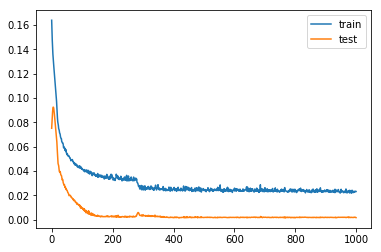

In [304]:
# # fit network
# history = model.fit(train_X, train_y, epochs = epoch, batch_size = batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# model.save('LSTM_12_month_42371383480000_v1.h5')
# # del model

# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

In [312]:
#SAVE THE MODEL

# model.save('LSTM_12_month_42371383480000_gas_v1.h5')
model=load_model('LSTM_12_month_42371383480000_gas.h5')
# weights=model.get_weights()
# print(weights)
# model.save_weights('weights_42371383480000_gas_v1.hdf5')
# model.set_weights(weights)
weights=model.load_weights('weights_42371383480000_gas.hdf5')
# model.set_weights(weights)

In [313]:
#Predict the model on test
yhat = model.predict(test_X)
# print(yhat.shape)
# print(test_y.shape)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# print(inv_yhat.shape)
inv_yhat = inv_yhat[:,:]

# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,:]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE = mean_absolute_error(inv_y, inv_yhat)
print("MAE = "+str(MAE))

Test RMSE: 352.146
MAE = 243.129


In [314]:
# make a prediction on train
yhat_train = model.predict(train_X)

# invert scaling for train forecast
inv_yhat_train = scaler.inverse_transform(yhat_train)

# invert scaling for actual train
inv_y_train = scaler.inverse_transform(train_y)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Train RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE_train = mean_absolute_error(inv_y_train, inv_yhat_train)
print("MAE Train = "+str(MAE_train))

Train RMSE: 5696.012
MAE Train = 1828.33


In [315]:
# Calculate Mape
# Note LSTM always gives 1 step shifted reponse

#test Mape
Mape_test1=[]
for i in range(n_seq-1):
    mape1=(np.abs(inv_y[:,i]-inv_yhat[:,i+1])/(inv_y[:,i]+1))
    Mape_test1.append(mape1)
#print(Mape_test1)
Mape_test=np.mean(Mape_test1)

#Mape_test=np.mean(np.abs(inv_y[i]-inv_yhat[i+1])/(inv_y[i]+1))
#Mape_train=np.mean(np.abs(inv_y_train[i]-inv_yhat_train[i+1])/(inv_y_train[i]+1))
Mape_train=np.mean(np.abs(inv_y_train-inv_yhat_train)/(inv_y_train+1))

print("MAPE Train = "+str(Mape_train))
print("MAPE Test = "+str(Mape_test))

MAPE Train = 0.12449
MAPE Test = 0.107442


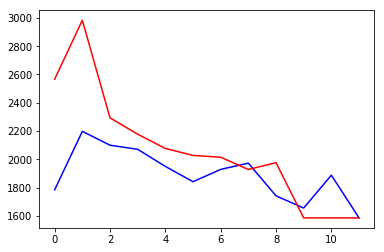

In [316]:
#red-predicted production
#blue-actual production
df1=pd.DataFrame(inv_y)
df2=pd.DataFrame(inv_yhat)
value1=df1.values
value2=df2.values
value1=value1.reshape(n_seq,1)
value2=value2.reshape(n_seq,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

In [317]:
# df1=pd.DataFrame(inv_y_train[0,:])
# df2=pd.DataFrame(inv_yhat_train[0,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[20,:])
# df2=pd.DataFrame(inv_yhat_train[20,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[40,:])
# df2=pd.DataFrame(inv_yhat_train[40,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

In [318]:
for i in range(len(inv_y)):
    for j in range(len(inv_y[i])):
        print(str(inv_y[i][j])+", "+str(inv_yhat[i][j]))

1785.0, 2566.84
2198.0, 2983.41
2100.0, 2293.36
2071.0, 2178.02
1950.0, 2076.96
1842.0, 2027.79
1929.0, 2015.1
1973.0, 1928.35
1742.0, 1976.41
1656.0, 1586.0
1888.0, 1586.0
1586.0, 1586.0


In [319]:
# get test results in CSV
df1=pd.DataFrame(inv_y[:,:-1])
df1=pd.DataFrame.transpose(df1)
df2=pd.DataFrame(inv_yhat[:,1:])
df2=pd.DataFrame.transpose(df2)
df3=pd.DataFrame(np.array(master_data2.iloc[-n_seq:-1,:]))
df3.columns=['YearMonth','Gas']
df4=pd.concat([df3,df1,df2],axis=1)
df4.columns=['YearMonth','Gas','Gas_Actual','Gas_Predicted']
print(df4)

    YearMonth     Gas   Gas_Actual  Gas_Predicted
0    201609.0  1785.0  1785.000000    2983.411621
1    201610.0  2198.0  2198.000000    2293.356445
2    201611.0  2100.0  2100.000000    2178.019043
3    201612.0  2071.0  2071.000000    2076.961426
4    201701.0  1950.0  1949.999878    2027.788696
5    201702.0  1842.0  1842.000000    2015.101807
6    201703.0  1929.0  1929.000000    1928.350830
7    201704.0  1973.0  1972.999878    1976.411377
8    201705.0  1742.0  1742.000000    1586.000000
9    201706.0  1656.0  1656.000122    1586.000000
10   201707.0  1888.0  1888.000000    1586.000000


In [320]:
df4.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/Gas_API_42371383480000_prediction.csv')

In [321]:
inv_yhat_train=pd.DataFrame(inv_yhat_train)
inv_yhat_train.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/Gas_API_42371383480000_inv_yhat_train.csv')

In [323]:
inv_y_train=pd.DataFrame(inv_y_train)
inv_y_train.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/Gas_API_42371383480000_inv_y_train.csv')